Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Data from Part 1
df_city_bikes = pd.read_csv('D:\lighthouse_bootcamp\Statistical-Modelling-Project/city_bikes.csv')
df_city_bikes

,Unnamed: 0,station name,empty slots,available bikes,latitude,longitude
0,0,01. Curtatone,16,0,43.321600,11.327948
1,1,02. S. Agostino,8,2,43.314554,11.331021
2,2,03. S. Girolamo,7,0,43.316539,11.337212
3,3,04. Fortezza,9,1,43.320523,11.323225
4,4,05. Antiporto,9,1,43.328983,11.321913
5,5,06. Due Ponti,9,3,43.317187,11.354256
6,6,07. Napoli,5,1,43.341757,11.305010
7,7,08. Ospedale,13,1,43.343243,11.326733
8,8,09. Acquacalda,9,1,43.336999,11.300975
9,9,10. Ravacciano,8,2,43.323781,11.338891


In [5]:
#Data from Part2
df_foursquare_yelp = pd.read_csv('D:\lighthouse_bootcamp\Statistical-Modelling-Project/foursquare_yelp.csv')
df_foursquare_yelp

,Unnamed: 0,station name,name,address,category,rating,review count
0,0,01. Curtatone,Pizzeria Alle Scalette,Viale Curtatone 18,Pizzeria,NaN,NaN
1,1,01. Curtatone,Piazza Giacomo Matteotti,Piazza Giacomo Matteotti,Plaza,NaN,NaN
2,2,01. Curtatone,Basilica di San Domenico,Piazza San Domenico,Church,NaN,NaN
3,3,01. Curtatone,Caffè La Piazzetta,Via Montanini 52,"Bar, Café, Italian Restaurant",NaN,NaN
4,4,01. Curtatone,Consorzio Agrario di Siena,Via Pianigiani Giuseppe 9,Grocery Store,NaN,NaN
...,...,...,...,...,...,...,...
408,408,19. Petriccio,la veranda,Piazza Calabria,Italian,4.5,6.0
409,409,19. Petriccio,Mc Donald's,Via Fiorentina 124,"Fast Food, Burgers",2.0,1.0
410,410,19. Petriccio,Fontebecci,Via Fiorentina 133,"Pizza, Italian",2.0,2.0
411,411,19. Petriccio,Bar Cecco,Viale Camillo Benso Conte Di Cavour,"Cafes, Fast Food, Pizza, Coffee & Tea",3.0,3.0


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [7]:
#Join the data from Part1 & Part2
df_merge = pd.merge(df_foursquare_yelp, df_city_bikes, on='station name')
df_merge.columns

Index(['Unnamed: 0_x', 'station name', 'name', 'address', 'category', 'rating',
       'review count', 'Unnamed: 0_y', 'empty slots', 'available bikes',
       'latitude', 'longitude'],
      dtype='object')

In [8]:
# remove the unused columns
df_merge = df_merge.drop('Unnamed: 0_x', axis=1)
df_merge = df_merge.drop('Unnamed: 0_y', axis=1)

In [9]:
# Find out more about the data using descriptive statistics.
df_merge.describe()

,rating,review count,empty slots,available bikes,latitude,longitude
count,223.000000,223.000000,413.000000,413.000000,413.000000,413.000000
mean,4.235426,20.744395,7.869249,1.200969,43.325393,11.326135
std,0.770779,27.316334,3.714619,1.730873,0.011160,0.011510
min,1.000000,1.000000,0.000000,0.000000,43.296856,11.300975
25%,4.000000,5.000000,6.000000,0.000000,43.317187,11.321913
50%,4.500000,14.000000,8.000000,1.000000,43.323781,11.326733
75%,4.500000,25.000000,9.000000,2.000000,43.332288,11.333702
max,5.000000,158.000000,16.000000,8.000000,43.347800,11.354256


In [27]:
# Display basic information about the DataFrame
print("Original DataFrame Info:")
print(df_merge.info())

Original DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station name     413 non-null    object 
 1   name             413 non-null    object 
 2   address          413 non-null    object 
 3   category         397 non-null    object 
 4   rating           223 non-null    float64
 5   review count     223 non-null    float64
 6   empty slots      413 non-null    int64  
 7   available bikes  413 non-null    int64  
 8   latitude         413 non-null    float64
 9   longitude        413 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 35.5+ KB
None


In [28]:
# Check for missing values
missing_values = df_merge.isnull().sum()
print("\nMissing Values:")
print(missing_values)


Missing Values:
station name         0
name                 0
address              0
category            16
rating             190
review count       190
empty slots          0
available bikes      0
latitude             0
longitude            0
dtype: int64


In [29]:
# Drop rows with missing values (you can choose a specific column or threshold)
df_merge_cleaned = df_merge.dropna()

In [31]:
# Drop duplicate rows
df_merge_cleaned = df_merge_cleaned.drop_duplicates()

In [32]:
# Display basic information about the cleaned DataFrame
print("\nCleaned DataFrame Info:")
print(df_merge_cleaned.info())


Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 10 to 412
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station name     222 non-null    object 
 1   name             222 non-null    object 
 2   address          222 non-null    object 
 3   category         222 non-null    object 
 4   rating           222 non-null    float64
 5   review count     222 non-null    float64
 6   empty slots      222 non-null    int32  
 7   available bikes  222 non-null    int32  
 8   latitude         222 non-null    float64
 9   longitude        222 non-null    float64
dtypes: float64(4), int32(2), object(4)
memory usage: 17.3+ KB
None


In [33]:
# Save the cleaned DataFrame to a new CSV file
df_merge_cleaned.to_csv('cleaned_data.csv', index=False)

<Axes: xlabel='rating', ylabel='Count'>

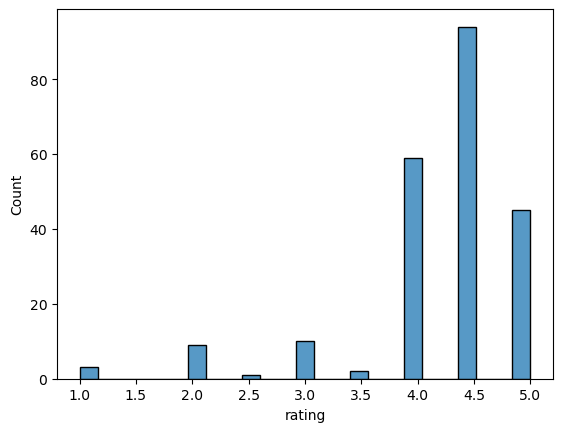

In [10]:
# histogram
sns.histplot(df_merge['rating'])

C:\Users\Admin\AppData\Local\Temp\ipykernel_13804\1275029778.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_merge.corr(), annot=True, cmap="tab20c")


<Axes: >

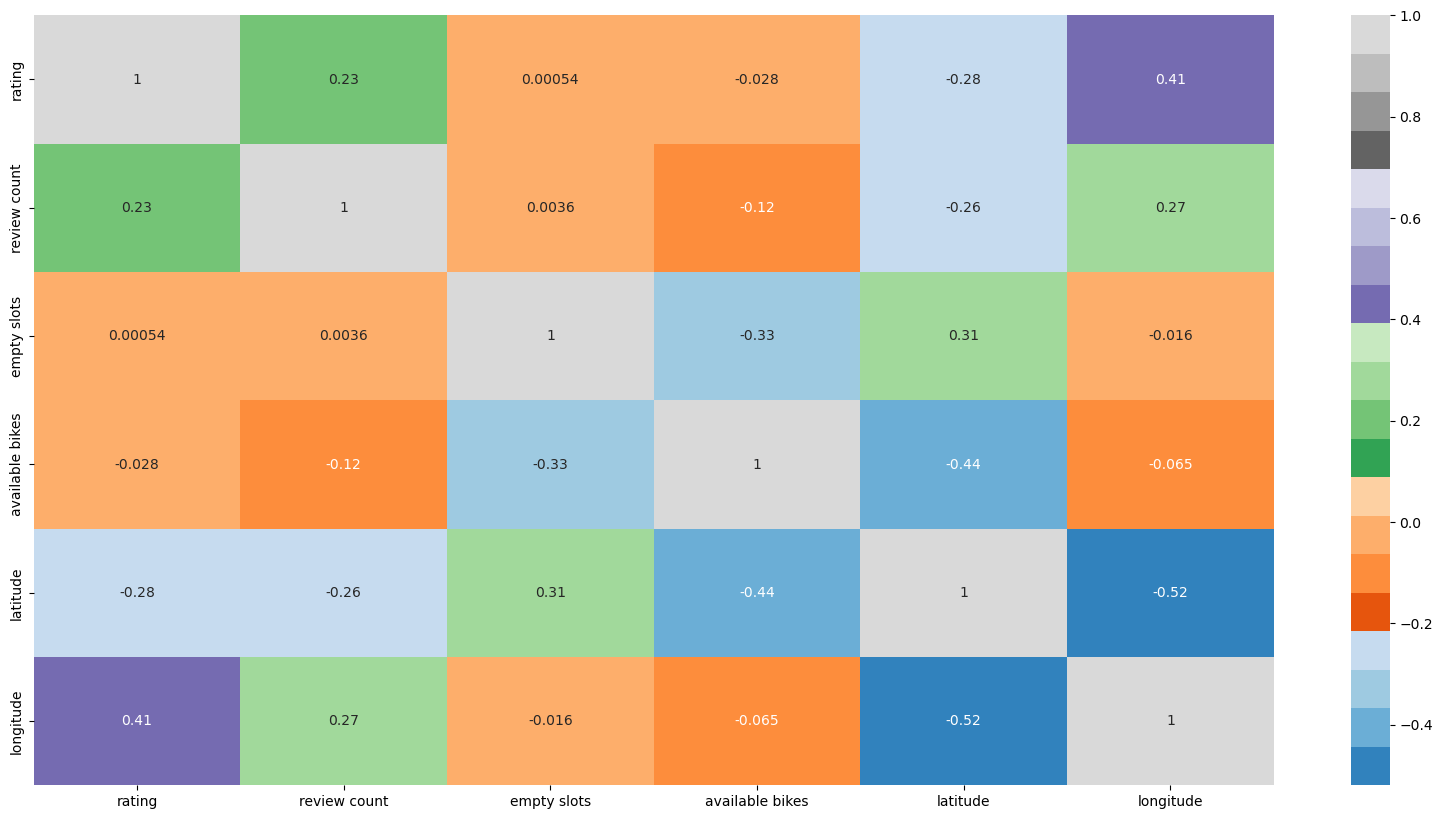

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(df_merge.corr(), annot=True, cmap="tab20c")

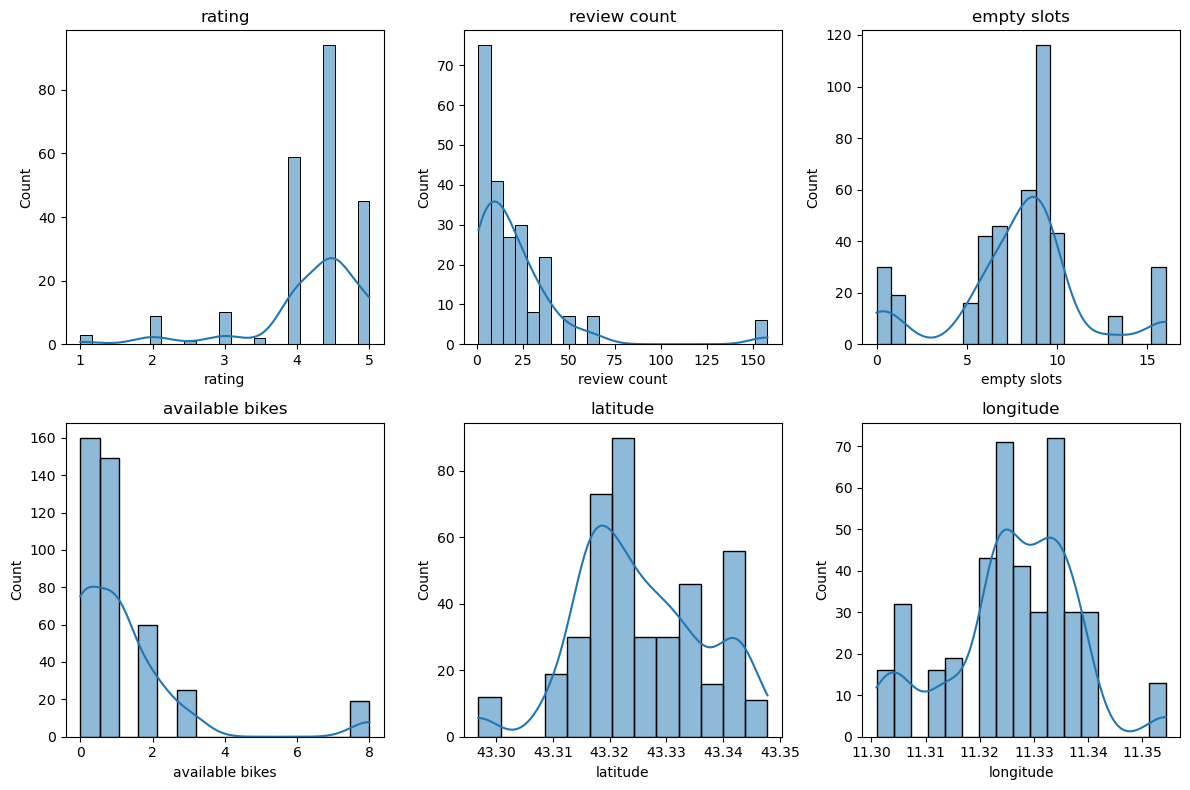

In [23]:
# Visualize distributions of numerical columns using histograms
numerical_columns = df_merge.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
for col in numerical_columns:
    plt.subplot(2, 3, numerical_columns.get_loc(col) + 1)
    sns.histplot(df_merge[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13804\3142654093.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


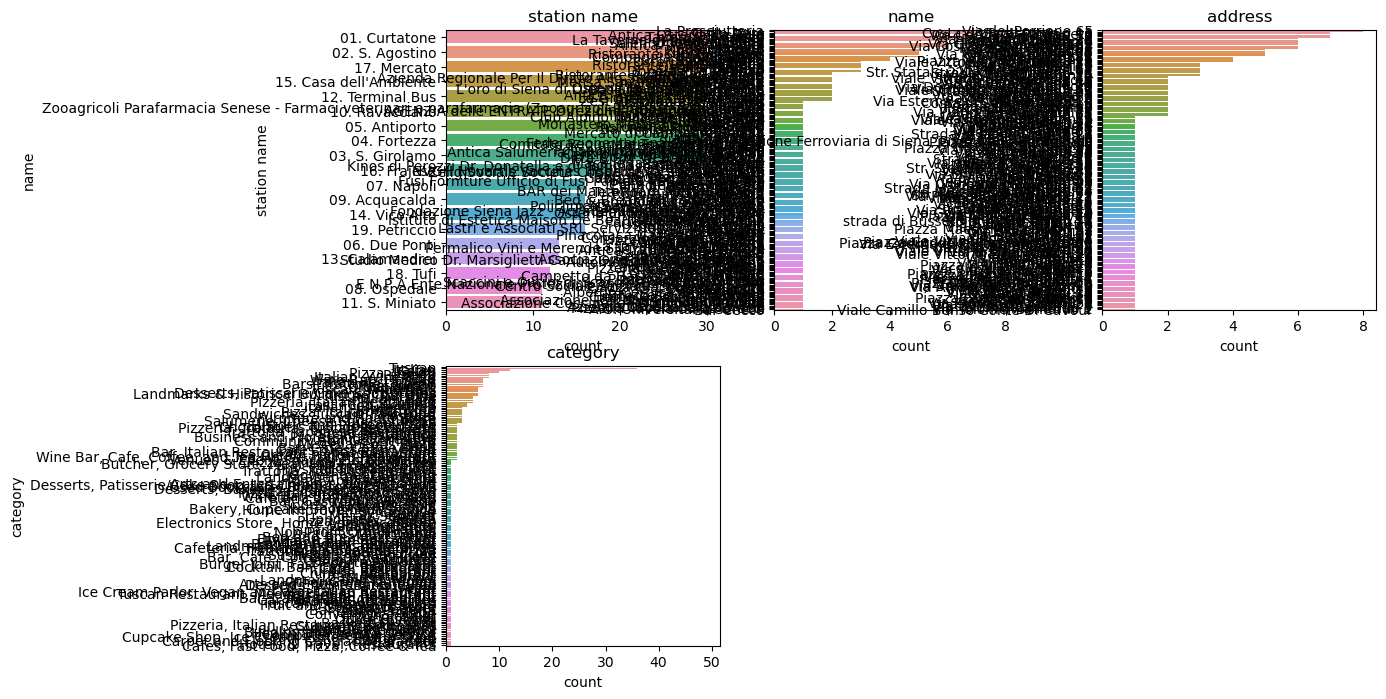

In [24]:
# Visualize distributions of categorical columns using bar plots
categorical_columns = df_merge.select_dtypes(include=['object']).columns
plt.figure(figsize=(12, 8))
for col in categorical_columns:
    plt.subplot(2, 3, categorical_columns.get_loc(col) + 1)
    sns.countplot(y=col, data=df_merge, order=df_merge[col].value_counts().index)
    plt.title(col)
plt.tight_layout()
plt.show()

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [12]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

In [13]:
connection = create_connection("sm_app.sqlite")

Connection to SQLite DB successful


Look at the data before and after the join to validate your data.

In [14]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query executed successfully")
    except Error as e:
        print(f"The error '{e}' occurred")

In [15]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station name     413 non-null    object 
 1   name             413 non-null    object 
 2   address          413 non-null    object 
 3   category         397 non-null    object 
 4   rating           223 non-null    float64
 5   review count     223 non-null    float64
 6   empty slots      413 non-null    int64  
 7   available bikes  413 non-null    int64  
 8   latitude         413 non-null    float64
 9   longitude        413 non-null    float64
dtypes: float64(4), int64(2), object(4)
memory usage: 35.5+ KB


In [18]:
create_pois_table = """
CREATE TABLE IF NOT EXISTS pois (
  "station name" TEXT NOT NULL,
  name TEXT PRIMARY KEY,
  address TEXT,
  category TEXT,
  rating FLOAT,
  "review count" FLOAT,
  "empty slots" INTEGER,
  "available bikes" INTEGER,
  latitude FLOAT,
  longitude FLOAT
);
"""

In [19]:
def execute_read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

In [20]:
execute_query(connection, create_pois_table)

Query executed successfully


In [21]:
df_merge.to_sql('pois', con=connection, if_exists='replace')

413

In [22]:
select_pois = "SELECT * from pois"
pois = execute_read_query(connection, select_pois)

for poi in pois:
    print(poi)

(0, '01. Curtatone', 'Pizzeria Alle Scalette', 'Viale Curtatone 18', 'Pizzeria', None, None, 16, 0, 43.32159969615422, 11.327948187171955)
(1, '01. Curtatone', 'Piazza Giacomo Matteotti', 'Piazza Giacomo Matteotti', 'Plaza', None, None, 16, 0, 43.32159969615422, 11.327948187171955)
(2, '01. Curtatone', 'Basilica di San Domenico', 'Piazza San Domenico', 'Church', None, None, 16, 0, 43.32159969615422, 11.327948187171955)
(3, '01. Curtatone', 'Caffè La Piazzetta', 'Via Montanini 52', 'Bar, Café, Italian Restaurant', None, None, 16, 0, 43.32159969615422, 11.327948187171955)
(4, '01. Curtatone', 'Consorzio Agrario di Siena', 'Via Pianigiani Giuseppe 9', 'Grocery Store', None, None, 16, 0, 43.32159969615422, 11.327948187171955)
(5, '01. Curtatone', 'Il Masgalano', 'Via Camporegio 1', 'Pizzeria, Italian Restaurant', None, None, 16, 0, 43.32159969615422, 11.327948187171955)
(6, '01. Curtatone', 'Zest Ristorante & Winebar', "Costa di Sant'Antonio 13", 'Wine Bar, Cafe, Coffee, and Tea House, Ita